## Visualization of Indian stock market sectoral nifty indices since covid era.

This project uses 5 years historical nifty index datasets.<br>
6 data sets are taken and visualized together.

## Hypothesis:

1. During covid era, the Nifty Pharma index grew faster than the Nifty 50(India's leading stock market index) because demand for pharmaceuticals was higher.
2. People desired to acquire their own automobile, therefore Nifty Auto developed quicker once it recovered from the covid era.
3. Nifty IT is growing quicker after recovering from the corona period, since digitalization accelerated during the shutdown and continued afterwards.
4. Nifty Bank has declined substantially during the covid lockout due to a variety of factors such as supply chain interruption, increasing bad loans, and so on.

Additional Information:<br>
Datasets downloaded from:https://www.investing.com/ <br>
The datasets are available on Drive: https://drive.google.com/drive/folders/1Y5ubu5axrLH7slrwrCxgYfnGw_kFsECj?usp=share_link <br>
The data source is discovered by searching "nifty indices" in the Google search engine and searching various websites for historical free data download. <br>
The data source is free to download and legal to use <br>
Documented EDA is not available for the data <br>
The proposed project has 6 datasets with 1303 rows and 7 columns each with 600KB of data for all data sets.

In [198]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import zipfile

In [199]:
#Install kaggle using this command: !pip install kaggle
#Ignore if already installed.
!kaggle datasets download -d sritejamadishetty8/project2-601 -p C:/kaggle/

project2-601.zip: Skipping, found more recently modified local copy (use --force to force download)


In [200]:
# Extract the CSV file from the zip file
with zipfile.ZipFile('C:/kaggle/project2-601.zip', 'r') as zip_ref:
    zip_ref.extractall('C:/kaggle/project2-601')

In [206]:
# Load the CSV files
df_n50 = pd.read_csv('C:/kaggle/project2-601/Nifty 50 Historical Data.csv')
df_auto = pd.read_csv('C:/kaggle/project2-601/Nifty Auto Historical Data.csv')
df_bank = pd.read_csv('C:/kaggle/project2-601/Nifty Bank Historical Data.csv')
df_fmcg = pd.read_csv('C:/kaggle/project2-601/Nifty FMCG Historical Data.csv')
df_it = pd.read_csv('C:/kaggle/project2-601/Nifty IT Historical Data.csv')
df_pharma = pd.read_csv('C:/kaggle/project2-601/Nifty Pharma Historical Data.csv')

In [207]:
#Dataframes are stored in a list to perform multiple actions using loop
dfs = [df_n50,df_auto,df_bank,df_fmcg,df_it,df_pharma]

In [208]:
#This is first impression of dataframe
df_n50

,Date,Price,Open,High,Low,Vol.,Change %
0,04/06/2023,"17,599.15","17,533.85","17,638.70","17,502.85",242.71B,0.24%
1,04/05/2023,"17,557.05","17,422.30","17,570.55","17,402.70",248.35B,0.91%
2,04/03/2023,"17,398.05","17,427.95","17,428.05","17,312.75",230.17B,0.22%
3,03/31/2023,"17,359.75","17,210.35","17,381.60","17,204.65",263.89B,1.63%
4,03/29/2023,"17,080.70","16,977.30","17,126.15","16,940.60",345.91B,0.76%
...,...,...,...,...,...,...,...
1299,01/05/2018,"10,558.85","10,534.25","10,566.10","10,520.10",186.47B,0.51%
1300,01/04/2018,"10,504.80","10,469.40","10,513.00","10,441.45",180.26B,0.59%
1301,01/03/2018,"10,443.20","10,482.65","10,503.60","10,429.55",172.52B,0.01%
1302,01/02/2018,"10,442.20","10,477.55","10,495.20","10,404.65",158.09B,0.06%


In [209]:
#We are removing unnecessary columns from all dataframes 
for df in dfs:
    df.drop(['Open', 'High','Low'], axis=1, inplace=True)

In [210]:
df_n50

,Date,Price,Vol.,Change %
0,04/06/2023,"17,599.15",242.71B,0.24%
1,04/05/2023,"17,557.05",248.35B,0.91%
2,04/03/2023,"17,398.05",230.17B,0.22%
3,03/31/2023,"17,359.75",263.89B,1.63%
4,03/29/2023,"17,080.70",345.91B,0.76%
...,...,...,...,...
1299,01/05/2018,"10,558.85",186.47B,0.51%
1300,01/04/2018,"10,504.80",180.26B,0.59%
1301,01/03/2018,"10,443.20",172.52B,0.01%
1302,01/02/2018,"10,442.20",158.09B,0.06%


In [211]:
#Date is formatted using pandas function
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'])

In [212]:
df_n50

,Date,Price,Vol.,Change %
0,2023-04-06,"17,599.15",242.71B,0.24%
1,2023-04-05,"17,557.05",248.35B,0.91%
2,2023-04-03,"17,398.05",230.17B,0.22%
3,2023-03-31,"17,359.75",263.89B,1.63%
4,2023-03-29,"17,080.70",345.91B,0.76%
...,...,...,...,...
1299,2018-01-05,"10,558.85",186.47B,0.51%
1300,2018-01-04,"10,504.80",180.26B,0.59%
1301,2018-01-03,"10,443.20",172.52B,0.01%
1302,2018-01-02,"10,442.20",158.09B,0.06%


In [213]:
#We are removing data previous to year 2020 inorder to only vizualize post covid data.
start_date ='2020-01-01'
for df in dfs:
    df.drop(df[df['Date'] < start_date].index, inplace=True)
df_bank

,Date,Price,Vol.,Change %
0,2023-04-06,"41,041.00",196.45M,0.10%
1,2023-04-05,"40,999.15",177.38M,0.46%
2,2023-04-03,"40,813.05",167.45M,0.50%
3,2023-03-31,"40,608.65",188.00M,1.75%
4,2023-03-29,"39,910.15",259.64M,0.86%
...,...,...,...,...
808,2020-01-07,"31,399.40",294.37M,0.52%
809,2020-01-06,"31,237.15",256.24M,-2.59%
810,2020-01-03,"32,069.25",217.58M,-1.15%
811,2020-01-02,"32,443.85",253.56M,1.06%


In [214]:
#This is to sort data in descending order.
for df in dfs:
    df.sort_index(ascending=False, inplace=True)

In [215]:
df_it

,Date,Price,Vol.,Change %
811,2020-01-01,"15,722.15",9.39M,0.45%
810,2020-01-02,"15,709.65",15.23M,-0.08%
809,2020-01-03,"15,936.60",26.01M,1.44%
808,2020-01-06,"15,879.80",24.00M,-0.36%
807,2020-01-07,"15,895.20",24.23M,0.10%
...,...,...,...,...
4,2023-03-29,"28,011.30",23.47M,1.11%
3,2023-03-31,"28,698.60",22.63M,2.45%
2,2023-04-03,"28,633.00",13.11M,-0.23%
1,2023-04-05,"28,977.20",21.53M,1.20%


In [216]:
#We are resetting index of dataframes after sorting data.
for df in dfs:
    df.reset_index(drop=True, inplace=True)

In [217]:
df_it

,Date,Price,Vol.,Change %
0,2020-01-01,"15,722.15",9.39M,0.45%
1,2020-01-02,"15,709.65",15.23M,-0.08%
2,2020-01-03,"15,936.60",26.01M,1.44%
3,2020-01-06,"15,879.80",24.00M,-0.36%
4,2020-01-07,"15,895.20",24.23M,0.10%
...,...,...,...,...
807,2023-03-29,"28,011.30",23.47M,1.11%
808,2023-03-31,"28,698.60",22.63M,2.45%
809,2023-04-03,"28,633.00",13.11M,-0.23%
810,2023-04-05,"28,977.20",21.53M,1.20%


In [218]:
#Removing % symbol from 'Change %' column and convert it from string to float to perform some calculations.
for df in dfs:
    df['Change %'] = df['Change %'].str.rstrip('%').astype(float)

In [219]:
type(df_n50['Change %'][0])

numpy.float64

In [220]:
df_n50

,Date,Price,Vol.,Change %
0,2020-01-01,"12,182.50",304.08B,0.12
1,2020-01-02,"12,282.20",407.70B,0.82
2,2020-01-03,"12,226.65",428.77B,-0.45
3,2020-01-06,"11,993.05",396.50B,-1.91
4,2020-01-07,"12,052.95",447.82B,0.50
...,...,...,...,...
808,2023-03-29,"17,080.70",345.91B,0.76
809,2023-03-31,"17,359.75",263.89B,1.63
810,2023-04-03,"17,398.05",230.17B,0.22
811,2023-04-05,"17,557.05",248.35B,0.91


In [221]:
#Created new cloumn of data "Growth" from existing data which is helpful is vizualization
for df in dfs:
     df['Growth'] = (df['Change %']).cumsum().round(2)

In [222]:
df_it

,Date,Price,Vol.,Change %,Growth
0,2020-01-01,"15,722.15",9.39M,0.45,0.45
1,2020-01-02,"15,709.65",15.23M,-0.08,0.37
2,2020-01-03,"15,936.60",26.01M,1.44,1.81
3,2020-01-06,"15,879.80",24.00M,-0.36,1.45
4,2020-01-07,"15,895.20",24.23M,0.10,1.55
...,...,...,...,...,...
807,2023-03-29,"28,011.30",23.47M,1.11,68.99
808,2023-03-31,"28,698.60",22.63M,2.45,71.44
809,2023-04-03,"28,633.00",13.11M,-0.23,71.21
810,2023-04-05,"28,977.20",21.53M,1.20,72.41


# Vizualization

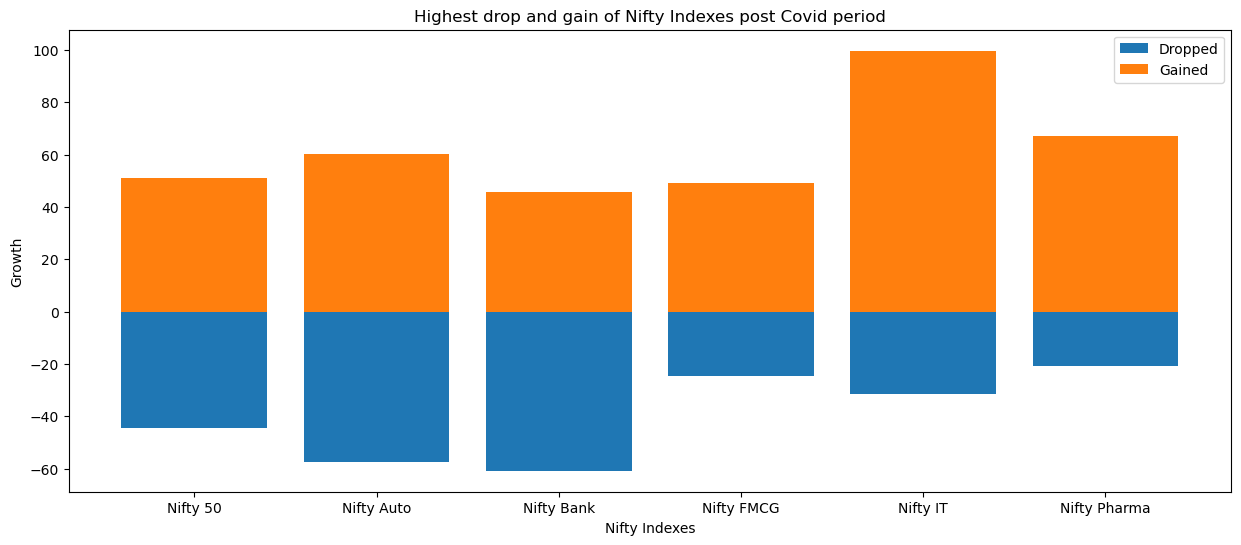

In [223]:
#Calculating gained and dropped values using newly created growth column
min_values = [df['Growth'].min() for df in [df_n50,df_auto,df_bank,df_fmcg,df_it,df_pharma]]
max_values = [df['Growth'].max() for df in [df_n50,df_auto,df_bank,df_fmcg,df_it,df_pharma]]
#Plotting a Bar graph using min and max Growth values of all Nifty Indexes.
fig, ax = plt.subplots(figsize =(15,6) )
ax.bar(['Nifty 50','Nifty Auto','Nifty Bank','Nifty FMCG','Nifty IT','Nifty Pharma'], min_values, label='Dropped')
ax.bar(['Nifty 50','Nifty Auto','Nifty Bank','Nifty FMCG','Nifty IT','Nifty Pharma'], max_values, label='Gained')
ax.legend()
ax.set_ylabel('Growth')
ax.set_xlabel('Nifty Indexes')
ax.set_title('Highest drop and gain of Nifty Indexes post Covid period')
plt.show()

# Hypothesis

### 1.During covid era, the Nifty Pharma index grew faster than the Nifty 50(India's leading stock market index) because demand for pharmaceuticals was higher.

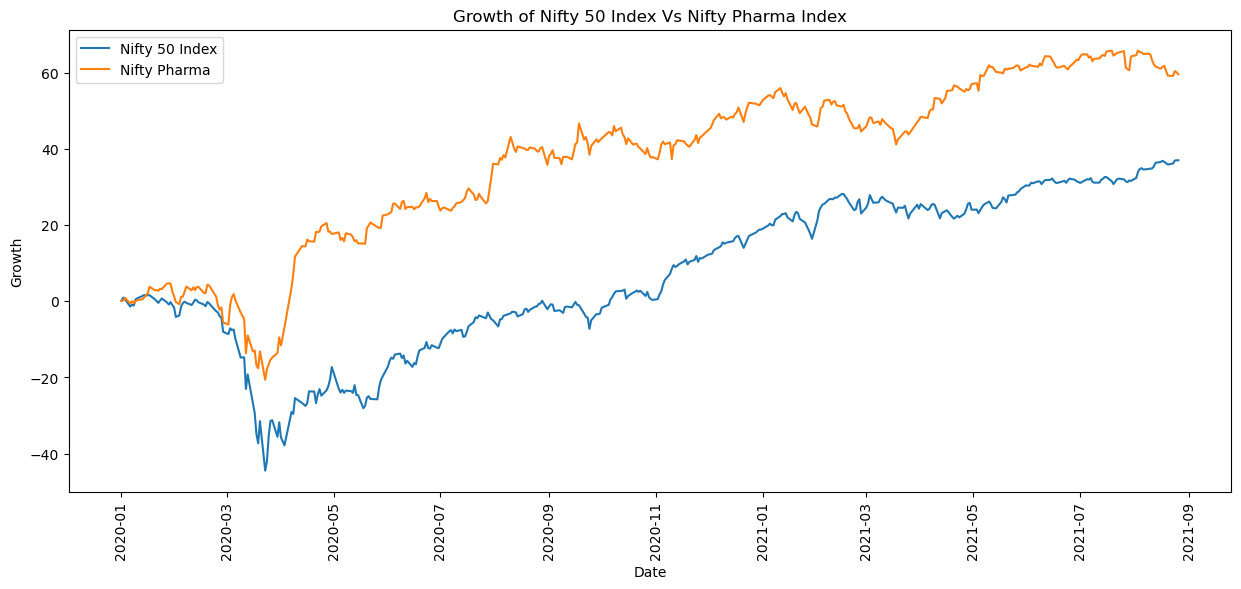

In [226]:
    #Bar graph to show Growth of Nifty 50 Index Vs Nifty Pharma Index in covid era.
    fig,ax = plt.subplots(figsize =(15,6) )
    ax.plot(df_n50['Date'][:-400:], df_n50['Growth'][:-400:], label='Nifty 50 Index')
    ax.plot(df_pharma['Date'][:-400:],df_pharma['Growth'][:-400:], label='Nifty Pharma')
    ax.tick_params(axis='x', labelrotation=90)
    # Set plot title and labels
    plt.title("Growth of Nifty 50 Index Vs Nifty Pharma Index")
    plt.xlabel('Date')
    plt.ylabel('Growth')
    # Add legend and show plot
    plt.legend()
    plt.show()

Above graph clearly shows that, Nifty Pharma index grew faster than the Nifty 50 index in covid era because of demand for pharmaceuticals.

### 2.People desired to acquire their own automobile, therefore Nifty Auto developed quicker once it recovered from the covid era.

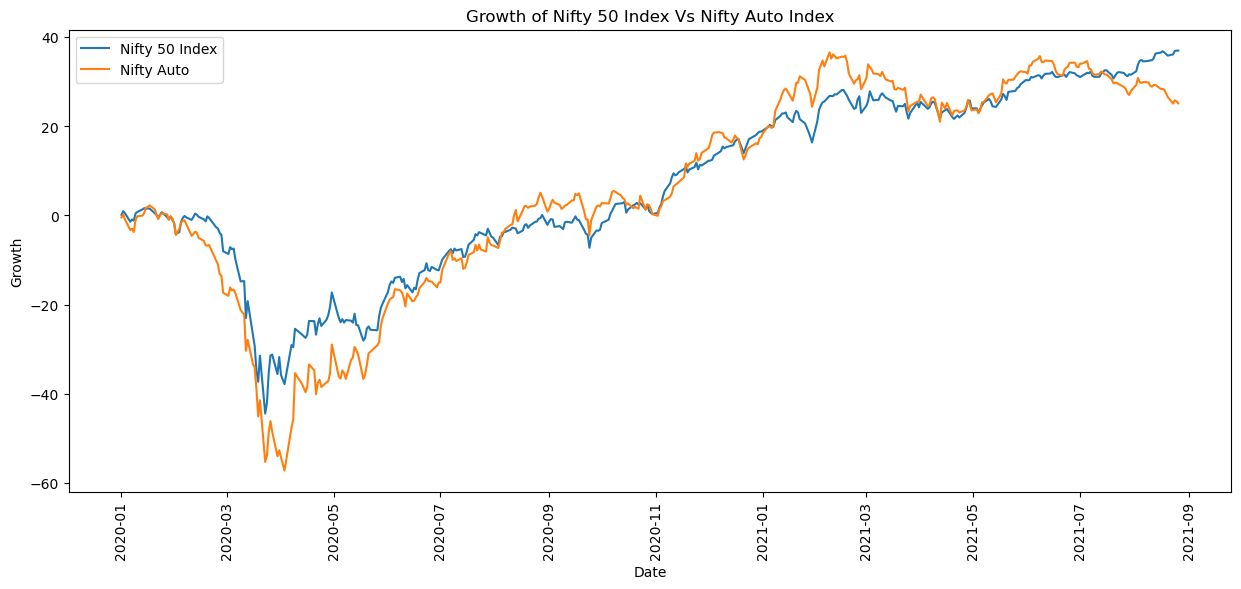

In [227]:
    #Bar graph to show Growth of Nifty 50 Index Vs Nifty Auto Index in covid era.
    fig,ax = plt.subplots(figsize =(15,6) )
    ax.plot(df_n50['Date'][:-400:], df_n50['Growth'][:-400:], label='Nifty 50 Index')
    ax.plot(df_auto['Date'][:-400:],df_auto['Growth'][:-400:], label='Nifty Auto')
    ax.tick_params(axis='x', labelrotation=90)
    # Set plot title and labels
    plt.title("Growth of Nifty 50 Index Vs Nifty Auto Index")
    plt.xlabel('Date')
    plt.ylabel('Growth')
    # Add legend and show plot
    plt.legend()
    plt.show()

Above graph doesn't shows any clear insight between Nifty Auto and Nifty 50 index.<br>
Our hypothesis that,People desired to acquire their own automobile after recovering from covid period is wrong.

### 3.Nifty IT is growing quicker after recovering from the corona period, since digitalization accelerated during the shutdown and continued afterwards.

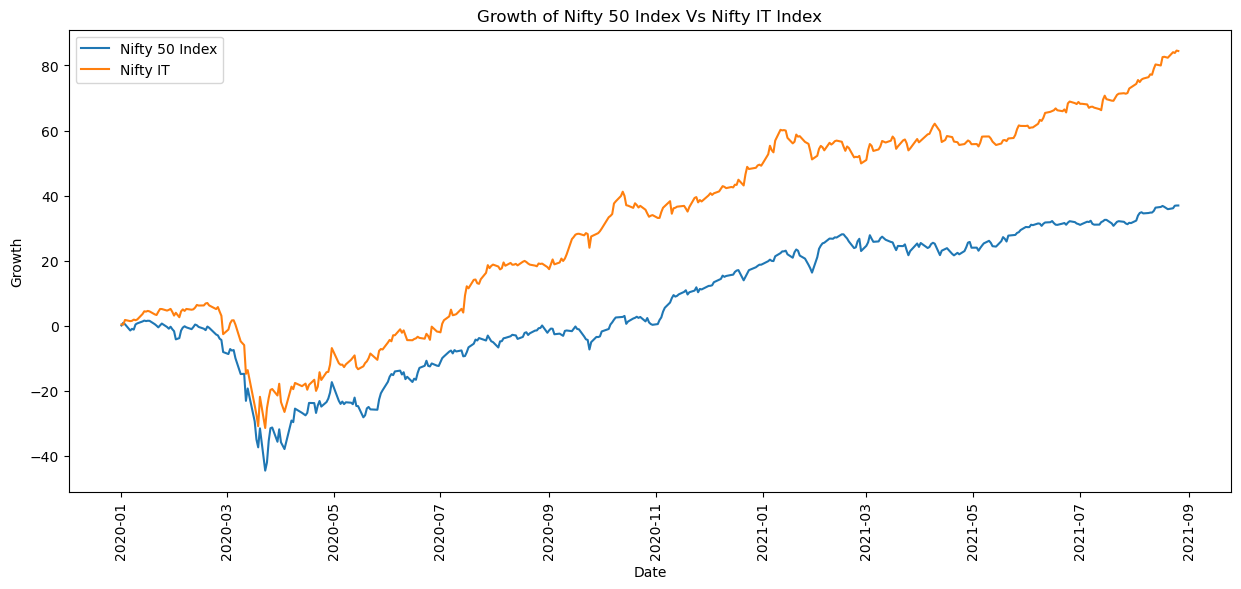

In [228]:
    #Bar graph to show Growth of Nifty 50 Index Vs Nifty IT Index in covid era.
    fig,ax = plt.subplots(figsize =(15,6) )
    ax.plot(df_n50['Date'][:-400:], df_n50['Growth'][:-400:], label='Nifty 50 Index')
    ax.plot(df_it['Date'][:-400:],df_it['Growth'][:-400:], label='Nifty IT')
    ax.tick_params(axis='x', labelrotation=90)
    # Set plot title and labels
    plt.title("Growth of Nifty 50 Index Vs Nifty IT Index")
    plt.xlabel('Date')
    plt.ylabel('Growth')
    # Add legend and show plot
    plt.legend()
    plt.show()

Above graph clearly shows that, Nifty IT is growing quickly after recovering from the corona period.

### 4. Nifty Bank has declined substantially during the covid lockout due to a variety of factors such as supply chain interruption, increasing bad loans, and so on.

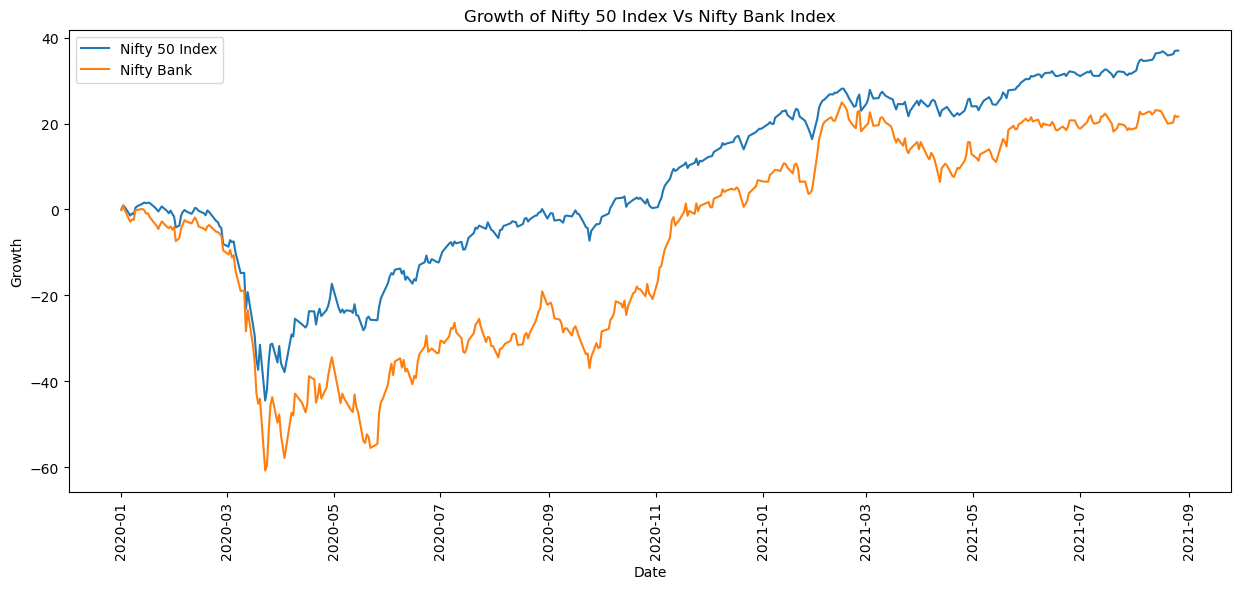

In [229]:
    #Bar graph to show Growth of Nifty 50 Index Vs Nifty Bank Index in covid era.
    fig,ax = plt.subplots(figsize =(15,6) )
    ax.plot(df_n50['Date'][:-400:], df_n50['Growth'][:-400:], label='Nifty 50 Index')
    ax.plot(df_bank['Date'][:-400:],df_bank['Growth'][:-400:], label='Nifty Bank')
    ax.tick_params(axis='x', labelrotation=90)
    # Set plot title and labels
    plt.title("Growth of Nifty 50 Index Vs Nifty Bank Index")
    plt.xlabel('Date')
    plt.ylabel('Growth')
    # Add legend and show plot
    plt.legend()
    plt.show()

Above graph shows that, Nifty Bank has drastically declined during the covid lockdown and recovery is slow paced.